**Exercise 8: Visualizing Kernel Ridge Regression**

*CPSC 381/581: Machine Learning*

*Yale University*

*Instructor: Alex Wong*

*Student: Hailey Robertson*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```

4. Move the 08_exercise_visualizing_kernel_ridge_regression.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises/08_exercise_visualizing_kernel_ridge_regressio.ipynb
```

In this exercise, we will optimize a kernel ridge regression with different kernels and visualize the decision boundaries.


**Submission**:

1. Implement all TODOs in the code blocks below.

2. List any collaborators.

```
N/A
```

Import packages

In [1]:
import numpy as np
import sklearn.datasets as skdata
from sklearn.kernel_ridge import KernelRidge as KernelRidgeRegressionSciKit
import warnings
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings(action='ignore')
np.random.seed = 1

Kernel Ridge Regression Hyperparameters

In [2]:
# Structured in form of [kernel_func, degree, gamma]
hyperparameters = [
    ['linear', 0, None],
    ['polynomial', 2, None],
    ['polynomial', 4, None],
    ['polynomial', 6, None],
    ['polynomial', 8, None],
    ['rbf', 0, 0.01],
    ['rbf', 0, 0.05],
    ['rbf', 0, 0.1],
    ['rbf', 0, 1],
]

Comparing linear, polynomial, and RBF kernels for 1D data

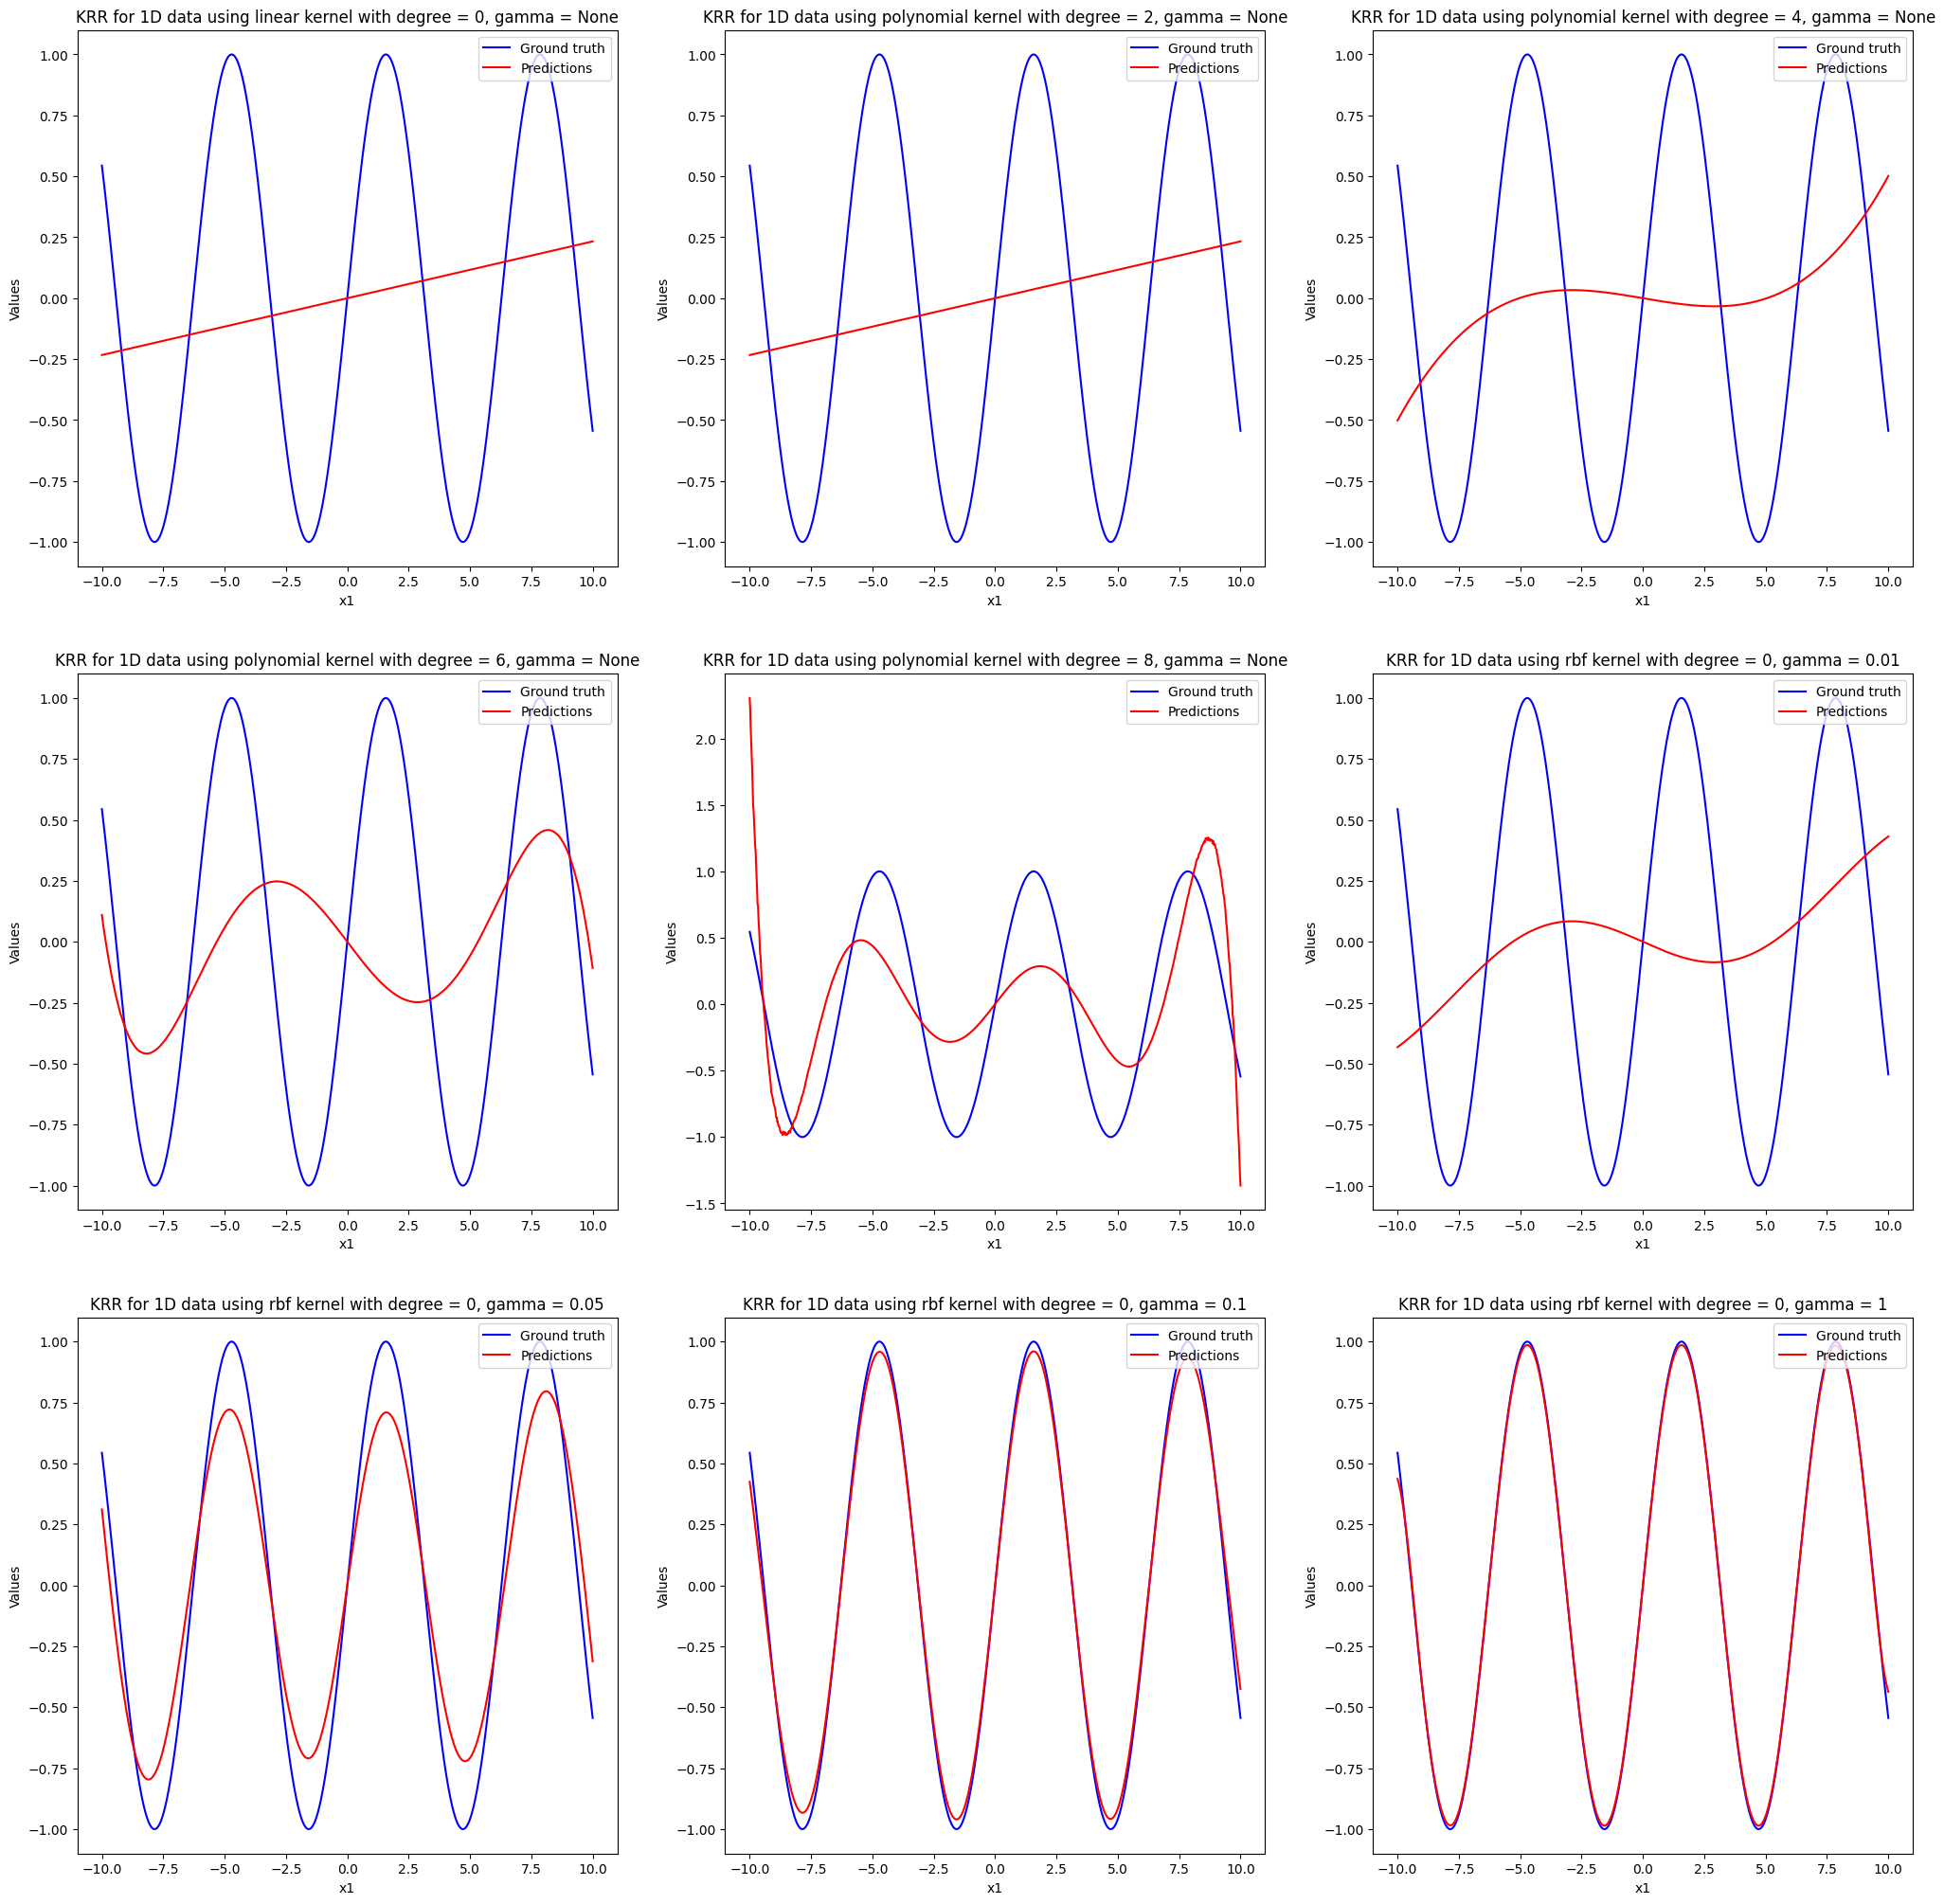

In [3]:
# Create sine dataset
X = np.reshape(np.linspace(-10, 10, 1000), (-1, 1))
y = np.sin(X).ravel()

# DONE: Create figure with figsize=(25, 25)
fig = plt.figure(figsize=(25, 25))

# DONE: Enumerate through kernel ridge regression hyperparameters with index
for idx, (kernel_func, degree, gamma) in enumerate(hyperparameters):

    # DONE: Instantiate and fit Kernel Ridge Regression model from scikit
    # using different kernel functions and their parameters using alpha=1.0
    model = KernelRidgeRegressionSciKit(kernel=kernel_func, alpha=1.0, degree=degree, gamma=gamma)
    model.fit(X, y)

    # DONE: Predict target value from X
    y_hat = model.predict(X)

    # DONE: Instantiate axis for subplot of a 3 x 3 figure
    ax = fig.add_subplot(3, 3, idx + 1)

    # DONE: Plot the original data with x-axis being the X and y-axis being y with color='blue', label='Ground truth'
    ax.plot(X, y, color='blue', label='Ground truth')

    # DONE: Plot the Kernel Ridge Regression (KRR) predictions with x-axis being the X and y-axis being predictions with color='red', label='Predictions'
    ax.plot(X, y_hat, color='red', label='Predictions')

    # DONE: Set title to 'KRR for 1D data using {} kernel with degree={}, gamma={}'
    ax.set_title(r'KRR for 1D data using {} kernel with degree = {}, gamma = {}'.format(kernel_func, degree, gamma))


    # DONE: Set xlabel to 'x1'
    ax.set_xlabel('x1')

    # DONE: Set ylabel to 'Values'
    ax.set_ylabel('Values')

    # DONE: Set legend with loc='upper right'
    ax.legend(loc='upper right')

plt.show()

Comparing linear, polynomial, and RBF kernels for 2D data

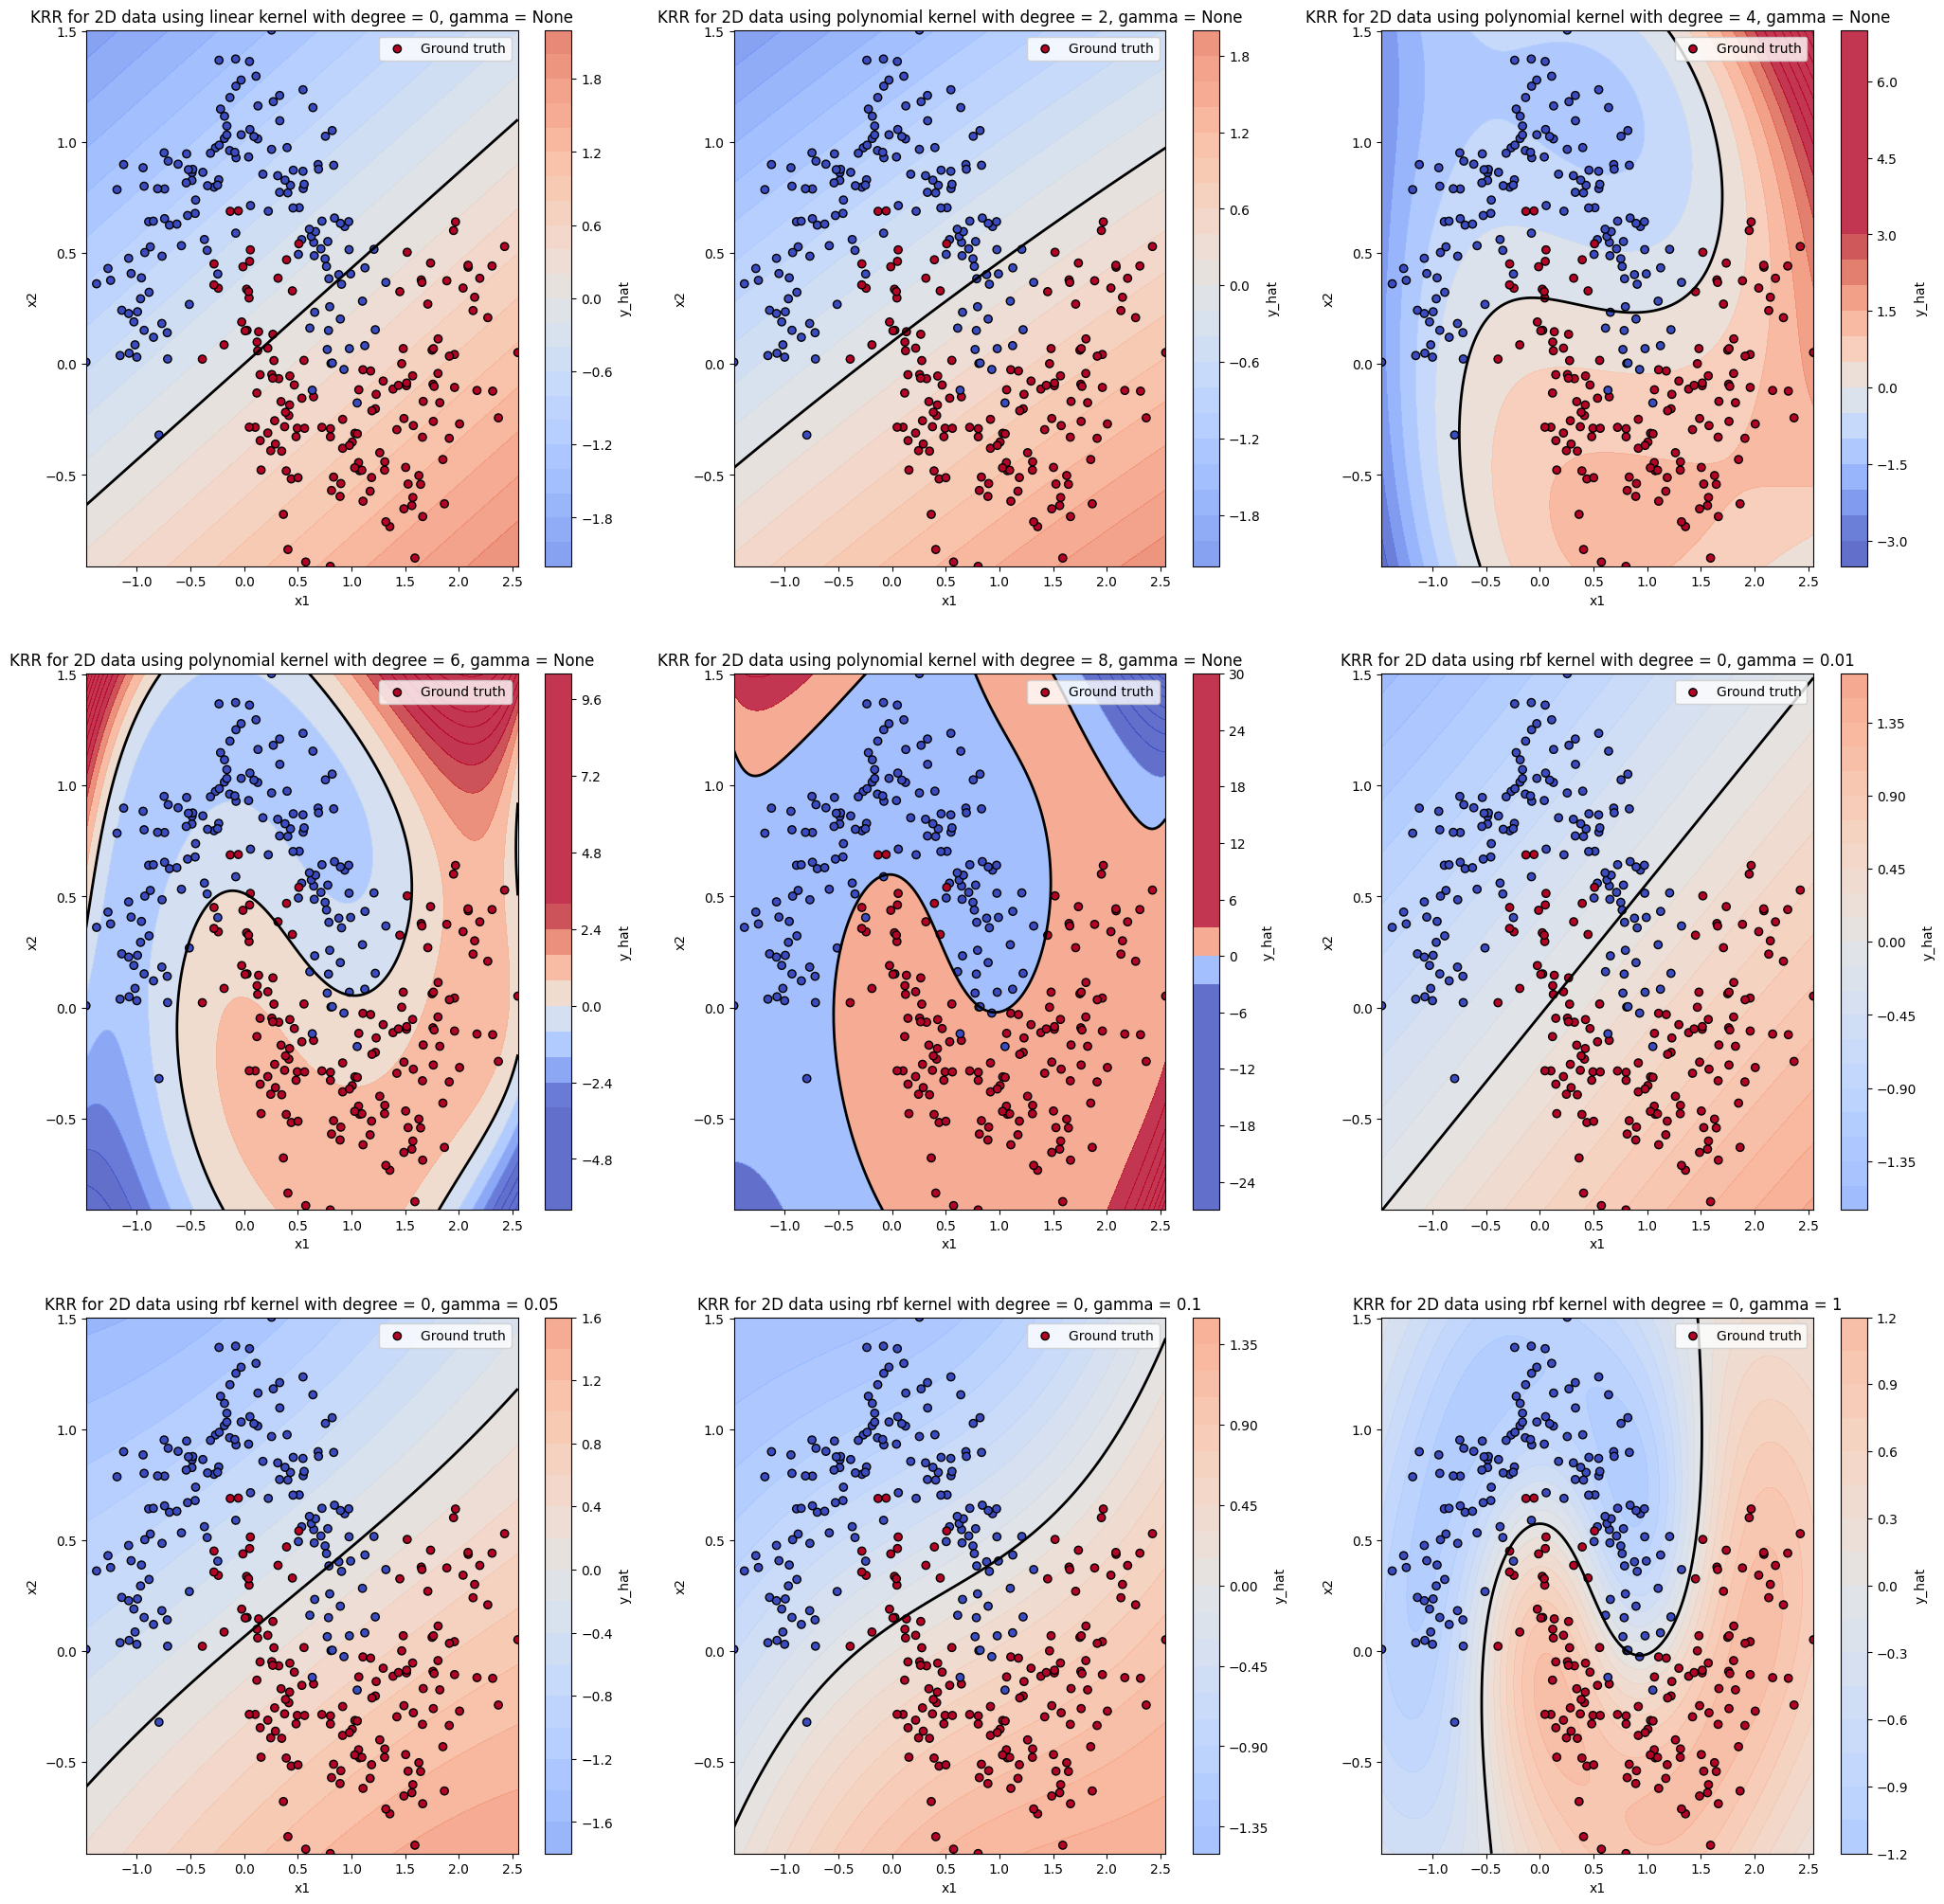

In [5]:
# Generate moons dataset for binary classification
X, y = skdata.make_moons(n_samples=300, noise=0.2, random_state=42)
y[y == 0] = -1

# DONE: Create figure with figsize=(25, 25)
fig = plt.figure(figsize=(25, 25))

# DONE: Enumerate through kernel ridge regression hyperparameters with index
for idx, (kernel_func, degree, gamma) in enumerate(hyperparameters):

    # DONE: Instantiate and fit Kernel Ridge Regression model from scikit
    # using different kernel functions and their parameters using alpha=1.0
    model = KernelRidgeRegressionSciKit(kernel=kernel_func, alpha=1.0, degree=degree, gamma=gamma)
    model.fit(X, y)

    # DONE: Get x1_min and x1_max (0-th dimension), and x2_min and x2_max (1-st dimension) from X
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    # DONE: Create 2 linspaces: one from x1_min to x1_max and the other from x1_min to x2_max with 500 units
    x1_linspace = np.linspace(x1_min, x1_max, 500)
    x2_linspace = np.linspace(x2_min, x2_max, 500)

    # DONE: Create meshgrid for x1 and x2 using linspaces
    x1, x2 = np.meshgrid(x1_linspace, x2_linspace)

    # DONE: Predict values for every point in meshgrid
    all_Xs = np.stack([x1.ravel(), x2.ravel()], axis=-1)
    y_hat = model.predict(all_Xs)

    # DONE: Reshape y_hat to x1 or x2's shape
    y_hat = np.reshape(y_hat, x1.shape)

    # DONE: Instantiate axis for subplot of a 3 x 3 figure
    ax = fig.add_subplot(3, 3, idx + 1)

    # DONE: Plot Contour for predictions with levels=20, cmap='coolwarm', alpha=0.8, vmin=-3, vmax=3
    contour = ax.contourf(x1, x2, y_hat, levels=20, cmap='coolwarm', alpha=0.8, vmin=-3, vmax=3)

    # DONE: Create colorbar for contour on axis and set its label to 'y_hat'
    cbar = fig.colorbar(contour, ax=ax, label='y_hat')

    # DONE: Plot decision boundary using levels=[0], colors='black', linewidths=2
    decision_boundary = ax.contour(x1, x2, y_hat, levels=[0], colors='black', linewidths=2)

    # DONE: Create scatter plot for X and set its color to y with edgecolor='black', cmap='coolwarm', label='Ground truth'
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='black', cmap='coolwarm', label='Ground truth')

    # DONE: Set title to 'KRR for 2D data using {} kernel with degree={}, gamma={}'
    ax.set_title(r'KRR for 2D data using {} kernel with degree = {}, gamma = {}'.format(kernel_func, degree, gamma))

    # DONE: Set xlabel to 'x1'
    ax.set_xlabel('x1')

    # DONE: Set ylabel to 'x2'
    ax.set_ylabel('x2')

    # DONE: Set legend with loc='upper right'
    ax.legend(loc='upper right')


plt.show()

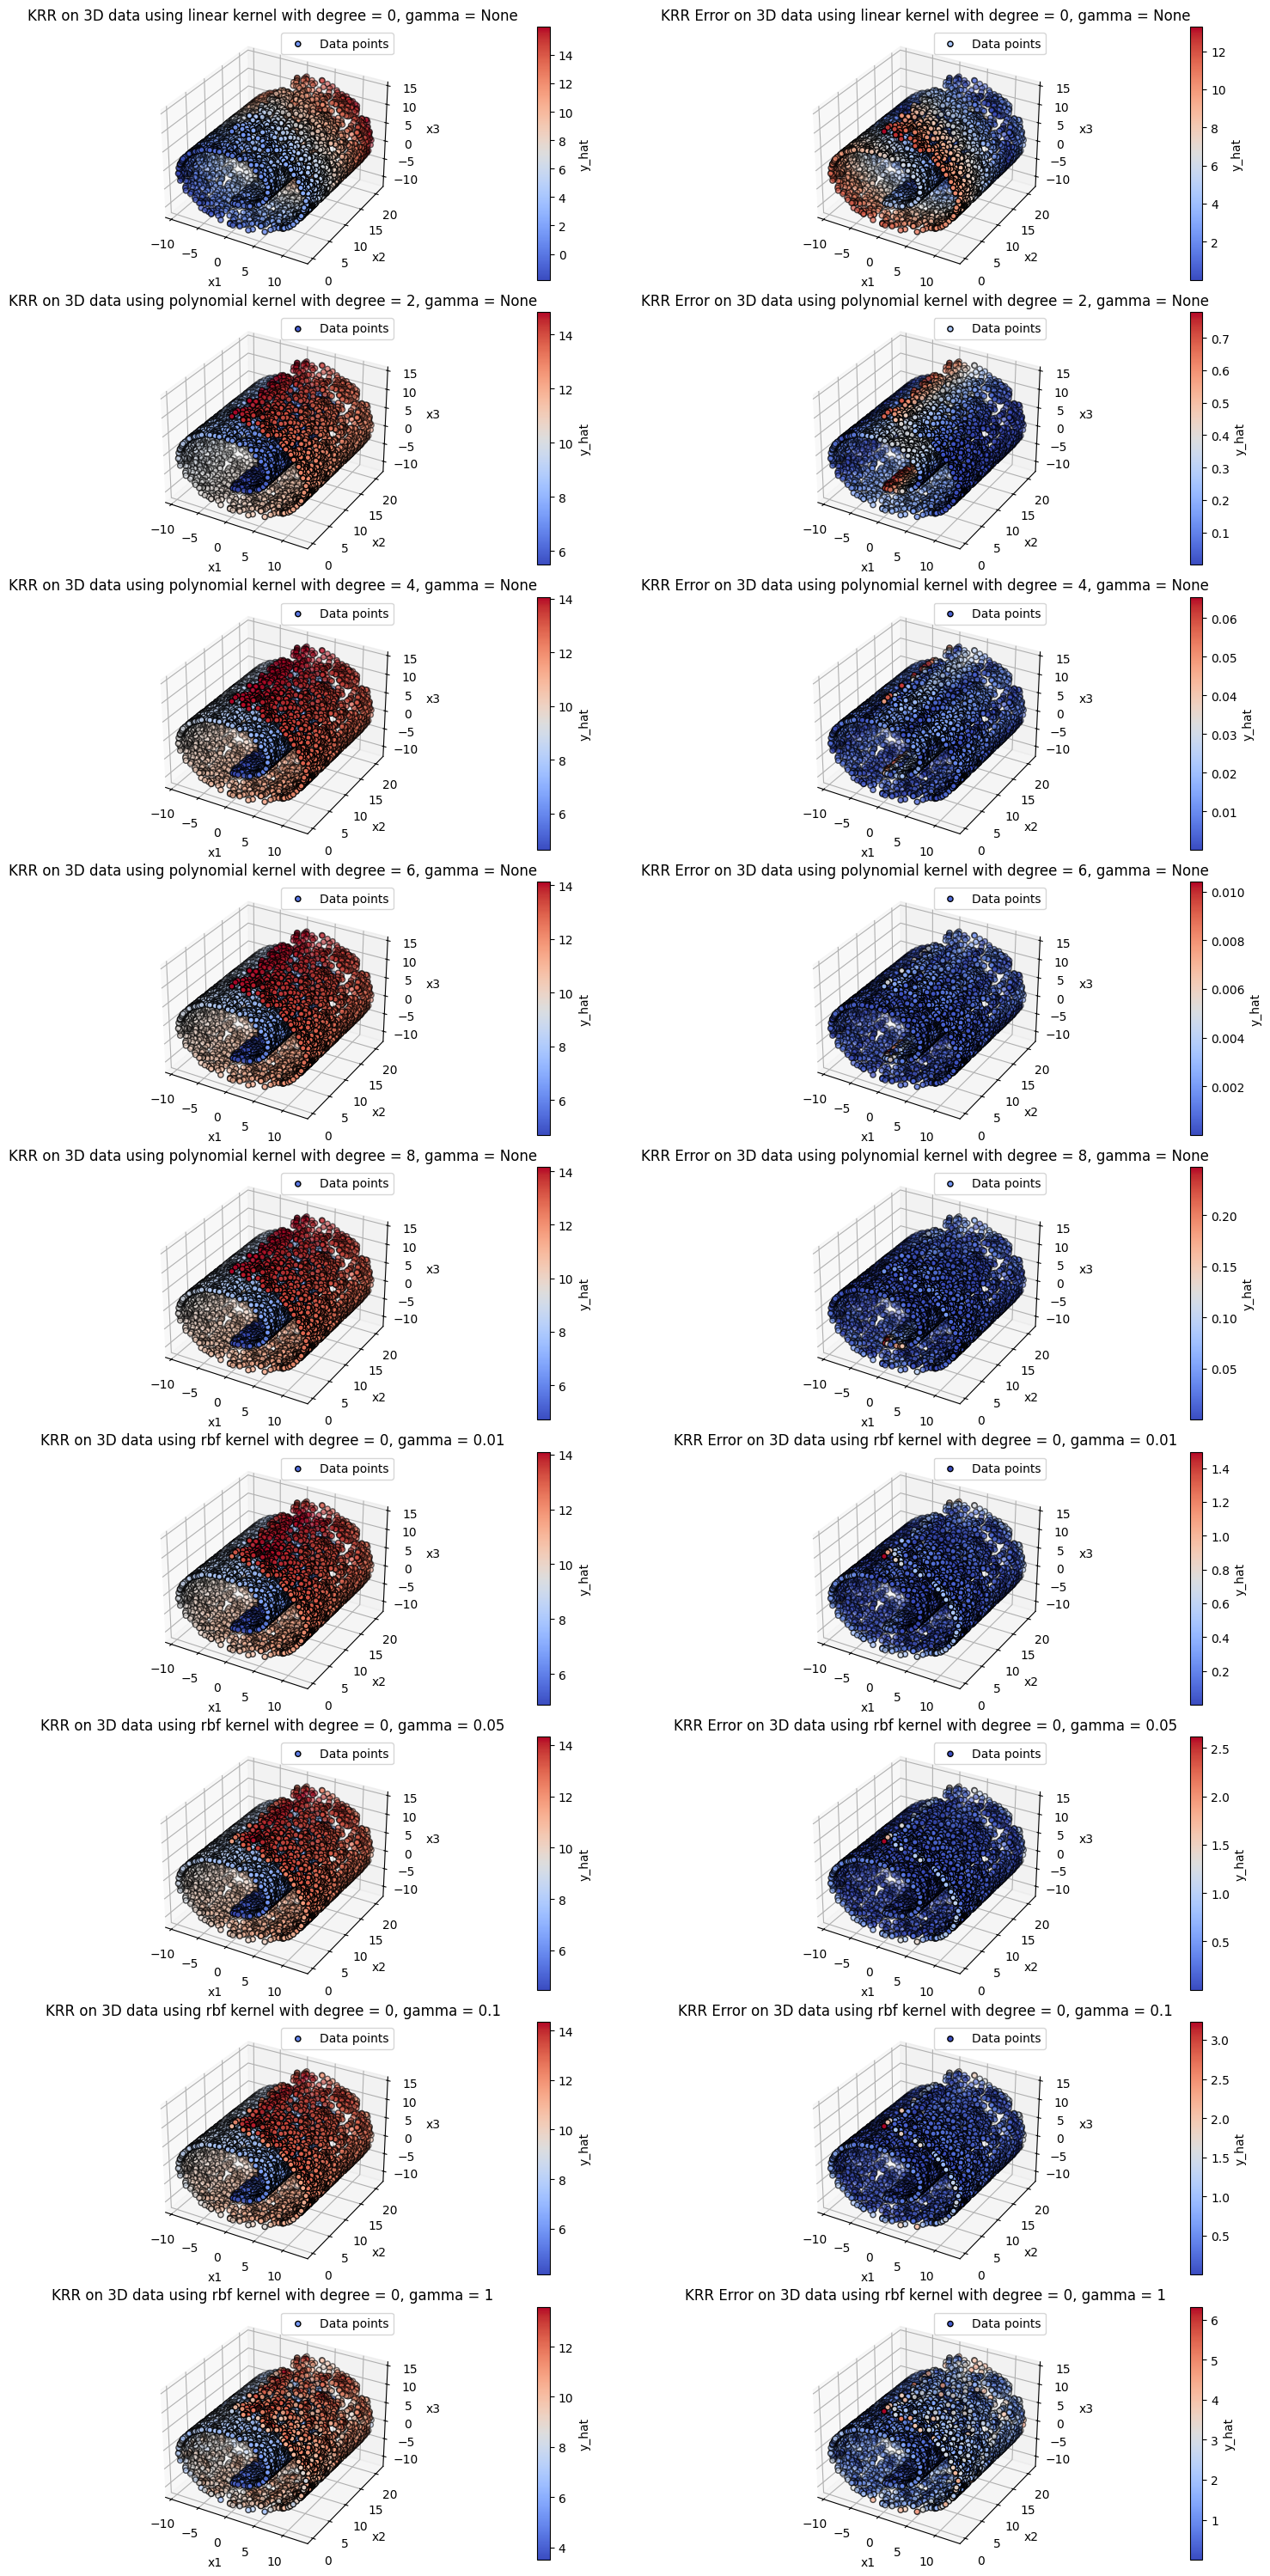

In [10]:
# Generate a 3-dimensional dataset
X, y = skdata.make_swiss_roll(n_samples=5000, noise=0.0, random_state=None, hole=False)
# Optional you should try it on S curve as well
# X, y = skdata.make_s_curve(n_samples=5000, noise=0.0, random_state=None)

# DONE: Create figure with figsize=(40, 30)
fig = plt.figure(figsize=(40, 30))

# DONE: Enumerate through kernel ridge regression hyperparameters with index
for idx, (kernel_func, degree, gamma) in enumerate(hyperparameters):

    # DONE: Instantiate and fit Kernel Ridge Regression model from scikit
    # using different kernel functions and their parameters using alpha=1.0
    model = KernelRidgeRegressionSciKit(kernel=kernel_func, alpha=1.0, degree=degree, gamma=gamma)
    model.fit(X, y)

    # DONE: Predict for X
    y_hat = model.predict(X)

    # DONE: Instantiate axis for subplot of a 9 x 2 figure with projection='3d', access the first column of the row
    ax1 = fig.add_subplot(9, 2, 2 * idx + 1, projection='3d')

    # DONE: Create scatter plot for X and set its color to y_hat with edgecolor='black', cmap='coolwarm', label='Data points'
    scatter1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_hat, edgecolor='black', cmap='coolwarm', label='Data points')

    # DONE: Create colorbar for scatter plot on axis with ax=ax1 and set its label to 'y_hat'
    cbar = fig.colorbar(scatter1, ax=ax1, label='y_hat')

    # DONE: Set title to 'KRR on 3D data using {} kernel with degree={}, gamma={}'
    ax1.set_title(r'KRR on 3D data using {} kernel with degree = {}, gamma = {}'.format(kernel_func, degree, gamma))

    # DONE: Set xlabel to 'x1'
    ax1.set_xlabel('x1')

    # DONE: Set ylabel to 'x2'
    ax1.set_ylabel('x2')

    # DONE: Set zlabel to 'x3'
    ax1.set_zlabel('x3')

    # DONE: Set legend with loc='upper right'
    ax1.legend(loc='upper right')

    # DONE: Measure error for each prediction using absolute error
    y_error = np.abs(y - y_hat)

    # DONE: Instantiate axis for subplot of a 9 x 2 figure with projection='3d', access the second column of the row
    ax2 = fig.add_subplot(9, 2, 2 * idx + 2, projection='3d')

    # DONE: Create scatter plot for X and set its color to y_error with edgecolor='black', cmap='coolwarm', label='Data points'
    scatter2 = ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_error, edgecolor='black', cmap='coolwarm', label='Data points')

    # DONE: Create colorbar for scatter plot on axis with ax=ax2 and set its label to 'y_hat'
    cbar = fig.colorbar(scatter2, ax=ax2, label='y_hat')

    # DONE: Set title to 'KRR Error on 3D data using {} kernel with degree={}, gamma={}'
    ax2.set_title(r'KRR Error on 3D data using {} kernel with degree = {}, gamma = {}'.format(kernel_func, degree, gamma))

    # DONE: Set xlabel to 'x1'
    ax2.set_xlabel('x1')

    # DONE: Set ylabel to 'x2'
    ax2.set_ylabel('x2')

    # DONE: Set zlabel to 'x3'
    ax2.set_zlabel('x3')

    # DONE: Set legend with loc='upper right'
    ax2.legend(loc='upper right')


fig.tight_layout(w_pad=-100.0)
plt.show()